In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score

data = pd.read_csv('heart.csv')
print(data)


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [3]:
numerical_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_cols:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].median())

In [4]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [5]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
svm_model = SVC(random_state=42)
lr_model = LogisticRegression(random_state=42)  
linear_reg = LinearRegression()  
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [9]:
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)  # Linear Regression
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
linear_reg_pred = linear_reg.predict(X_test)  # Continuous output
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [11]:
linear_reg_pred_binary = (linear_reg_pred >= 0.5).astype(int)

In [12]:
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

Support Vector Machine Accuracy: 0.8369565217391305

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        77
           1       0.87      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



In [13]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.842391304347826
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [14]:
print("Linear Regression Accuracy (thresholded):", accuracy_score(y_test, linear_reg_pred_binary))
print("Linear Regression Classification Report (thresholded):\n", classification_report(y_test, linear_reg_pred_binary))
print("\nLinear Regression R-squared:", r2_score(y_test, linear_reg_pred))

Linear Regression Accuracy (thresholded): 0.8260869565217391
Linear Regression Classification Report (thresholded):
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        77
           1       0.89      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184


Linear Regression R-squared: 0.4404783267915111


In [15]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.7880434782608695
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77        77
           1       0.87      0.75      0.80       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



In [16]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8586956521739131
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



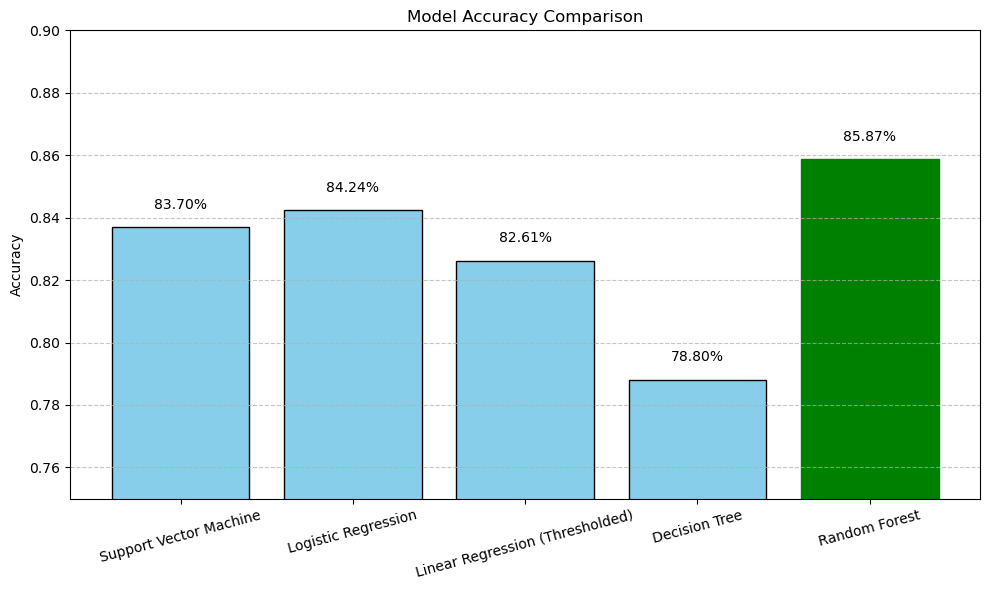

In [17]:
import matplotlib.pyplot as plt

models = [
    "Support Vector Machine",
    "Logistic Regression",
    "Linear Regression (Thresholded)",
    "Decision Tree",
    "Random Forest"
]

accuracies = [
    0.8369565217391305,
    0.842391304347826,
    0.8260869565217391,
    0.7880434782608695,
    0.8586956521739131
]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0.75, 0.9)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

best_index = accuracies.index(max(accuracies))
bars[best_index].set_color('green')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.005, f'{yval:.2%}', ha='center', va='bottom')

plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
